In [2]:
import xarray as xr
# import contextily as ctx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd
import os
from IPython.display import HTML
from matplotlib.colors import ListedColormap    
import matplotlib as mpl
from tqdm import tqdm


In [6]:
onslow = r'C:\Users\00100958\Daniel\Mardie\Data\Onslow_tide_2023_2024\Onslow_combined_all.csv'
df_onslow = pd.read_csv(onslow,
    parse_dates=True,
).squeeze()

df_onslow['Time'] = pd.to_datetime(df_onslow['timeutc'])
df_onslow

,timeutc,hAHD,Time
0,1985-12-31 16:00:00+0000,0.89,1985-12-31 16:00:00+00:00
1,1985-12-31 16:15:00+0000,0.91,1985-12-31 16:15:00+00:00
2,1985-12-31 16:30:00+0000,0.93,1985-12-31 16:30:00+00:00
3,1985-12-31 16:45:00+0000,0.96,1985-12-31 16:45:00+00:00
4,1985-12-31 17:00:00+0000,0.99,1985-12-31 17:00:00+00:00
...,...,...,...
3471067,2024-04-30 15:35:00+0000,0.10,2024-04-30 15:35:00+00:00
3471068,2024-04-30 15:40:00+0000,0.12,2024-04-30 15:40:00+00:00
3471069,2024-04-30 15:45:00+0000,0.14,2024-04-30 15:45:00+00:00
3471070,2024-04-30 15:50:00+0000,0.15,2024-04-30 15:50:00+00:00


In [7]:
data_onslow = df_onslow[['Time', 'hAHD']]
data_onslow = data_onslow.dropna()
data_onslow = data_onslow.set_index('Time')
data_onslow.keys()

monthly_max = data_onslow['hAHD'].resample('M').max()

annual_mean = data_onslow['hAHD'].resample('A').mean()

monthly_mean = data_onslow['hAHD'].resample('M').mean()




In [8]:
from scipy.signal import detrend

data_onslow_detrended = detrend(data_onslow['hAHD'], type='linear')
data_onslow_detrended


high_threshold = np.percentile(data_onslow_detrended, 99.99)  # 99.99th percentile
low_threshold = np.percentile(data_onslow_detrended, 0.01)   # 0.01th percentile
print(f"High threshold: {high_threshold}")
print(f"Low threshold: {low_threshold}")
data_onslow_detrended

High threshold: 1.5217794698367186
Low threshold: -1.4881750731629275


array([ 0.84257686,  0.86257682,  0.88257677, ..., -0.05221834,
       -0.04221838, -0.03221842])

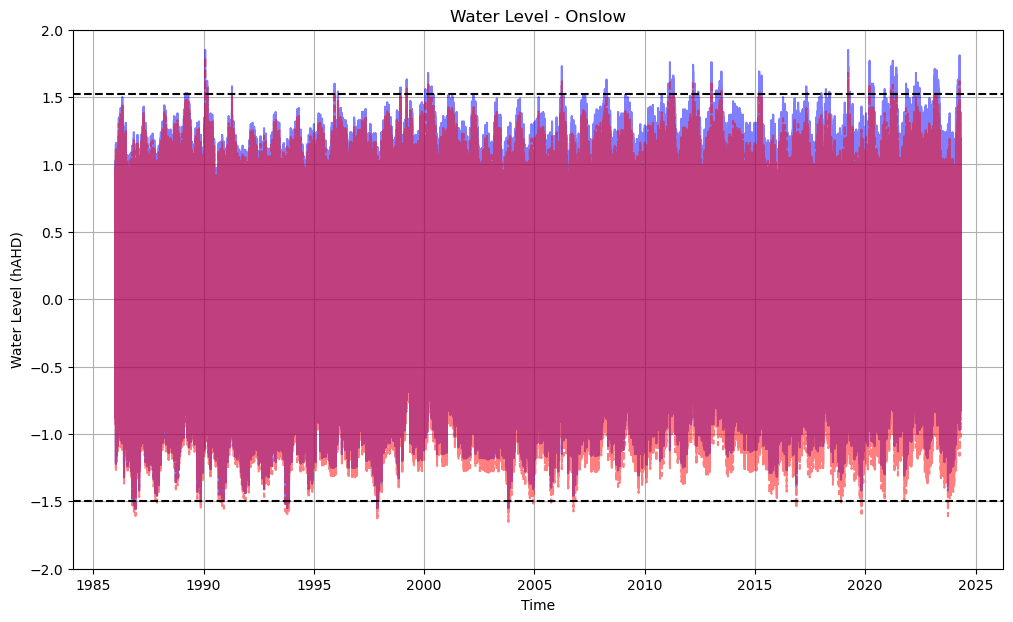

In [9]:

plt.figure(figsize=(12, 7))
plt.plot(data_onslow.index, data_onslow['hAHD'], label='_nolegend_', color='blue',alpha = 0.5)
plt.plot(data_onslow.index, data_onslow_detrended, label='detrended', color='red',alpha = 0.5,linestyle='--')
# plt.plot(monthly_max.index, monthly_max, label='Monthly Maximum Water Level (hAHD)', color='red')
# plt.plot(annual_mean.index, annual_mean, label='Annual Mean Water Level (hAHD)', color='black', linewidth=2)
# plt.plot(monthly_mean.index, monthly_mean, label='Monthly Mean Water Level (hAHD)', color='black', linewidth=2)
plt.axhline(y=1.52, color='black', linestyle='--', label='Threshold (1.52m)')
plt.axhline(y=-1.5, color='black', linestyle='--', label='Threshold (-1.5m)')

# plt.xlim(pd.Timestamp('1986-01-01'), pd.Timestamp('1991-04-30'))
plt.xlabel('Time')
plt.ylabel('Water Level (hAHD)')
plt.title('Water Level - Onslow')
# plt.legend(loc = 'lower right')
# plt.xlim(pd.Timestamp('1998-01-01'), pd.Timestamp('2000-12-31'))
plt.ylim(-2,2)
plt.grid(True)
plt.show()

c:\Users\00100958\Anaconda3\envs\Daniel\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


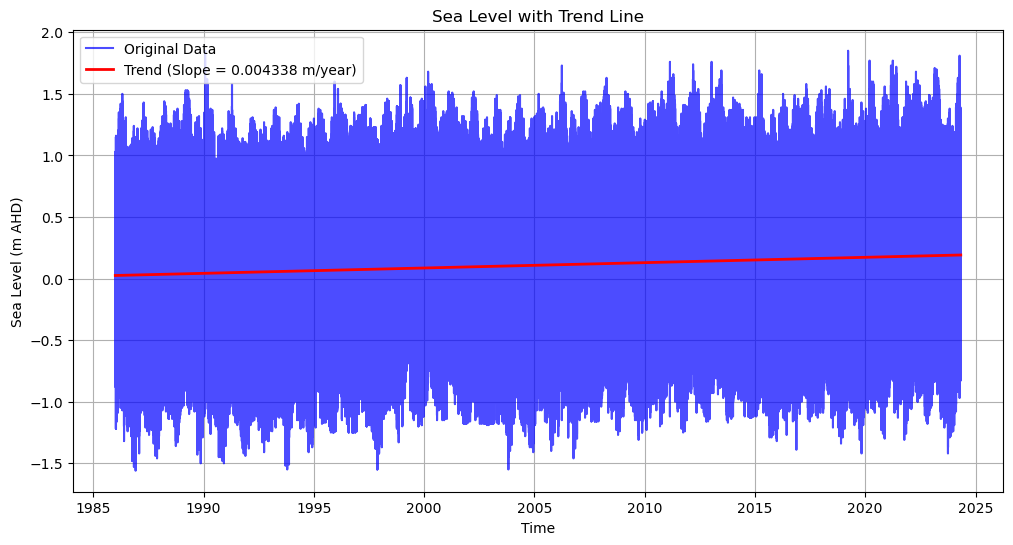

In [11]:

data_onslow['time'] = data_onslow.index

# Fit a linear trend to the sea level dataw
slope, intercept = np.polyfit(
    (data_onslow['time'] - data_onslow['time'].iloc[0]).dt.total_seconds(),
    data_onslow['hAHD'],
    1
)

# Calculate the trend line in terms of time
trend_line = intercept + slope * (data_onslow['time'] - data_onslow['time'].iloc[0]).dt.total_seconds()

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(data_onslow['time'], data_onslow['hAHD'], label='Original Data', color='blue', alpha=0.7)

# Plot the trend line on top
plt.plot(data_onslow['time'], trend_line, label=f'Trend (Slope = {slope * 365.25 * 24 * 3600:.6f} m/year)', color='red', linewidth=2)

# Labels and title
plt.xlabel('Time')
plt.ylabel('Sea Level (m AHD)')
plt.title('Sea Level with Trend Line')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
data_onslow = df_onslow[['Time', 'hAHD']]

data_onslow = data_onslow.dropna()
data_onslow = data_onslow.set_index('Time')
data_onslow_resampled = data_onslow.resample('1H').mean()
data_onslow_resampled

,hAHD
Time,
1985-12-31 16:00:00+00:00,0.922500
1985-12-31 17:00:00+00:00,1.015000
1985-12-31 18:00:00+00:00,0.960000
1985-12-31 19:00:00+00:00,0.550000
1985-12-31 20:00:00+00:00,0.080000
...,...
2024-04-30 11:00:00+00:00,-0.232500
2024-04-30 12:00:00+00:00,-0.384167
2024-04-30 13:00:00+00:00,-0.429167


In [13]:
time_series_onslow = data_onslow_resampled['hAHD']
time_series_nan_dropped = time_series_onslow.dropna()
# model_onslow = EVA(time_series_onslow)
# extremes_onslow = model_onslow.get_extremes(method="POT",extremes_type="high", threshold=1.6, r="24H") # 1.18 achieved best results


In [14]:
time_series_onslow

Time
1985-12-31 16:00:00+00:00    0.922500
1985-12-31 17:00:00+00:00    1.015000
1985-12-31 18:00:00+00:00    0.960000
1985-12-31 19:00:00+00:00    0.550000
1985-12-31 20:00:00+00:00    0.080000
                               ...   
2024-04-30 11:00:00+00:00   -0.232500
2024-04-30 12:00:00+00:00   -0.384167
2024-04-30 13:00:00+00:00   -0.429167
2024-04-30 14:00:00+00:00   -0.254167
2024-04-30 15:00:00+00:00    0.048333
Freq: H, Name: hAHD, Length: 336000, dtype: float64

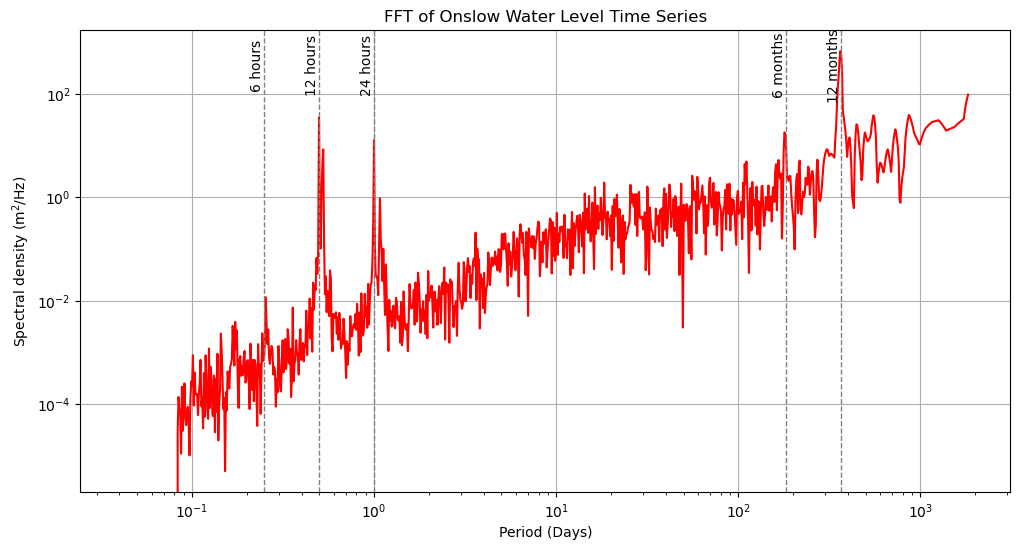

In [15]:
from scipy.interpolate import interp1d

time_series_nan_dropped = time_series_onslow.dropna()
n = len(time_series_nan_dropped)
sampling_interval = (time_series_nan_dropped.index[1] - time_series_nan_dropped.index[0]).total_seconds()
fft_values = np.fft.fft(time_series_nan_dropped.values, n)
frequencies = np.fft.fftfreq(n, d=sampling_interval)

# Only keep the positive half of frequencies (FFT is symmetric for real-valued input)
positive_freqs = frequencies[:n // 2]
positive_fft_values = np.abs(fft_values[:n // 2]) ** 2 / n

# Define target frequencies (1 hour to 2 years) in Hz
freq_min = 1 / (5 * 365.25 * 24 * 3600)  # Minimum frequency (2 years)
freq_max = 1 / (3600)  # Maximum frequency (1 hour)
target_freqs = np.logspace(np.log10(freq_min), np.log10(freq_max), 1000)  # 100 logarithmic points

# Interpolate FFT values to target frequencies
interpolator = interp1d(positive_freqs, positive_fft_values, kind='linear', bounds_error=False, fill_value="extrapolate")
interpolated_fft_values = interpolator(target_freqs)

# Convert target frequencies to periods in days
target_periods_days = 1 / (target_freqs * 86400)


# Periods to mark (in days)
vertical_lines_days = [
    6 / 24,    # 6 hours
    12 / 24,   # 12 hours
    24 / 24,   # 24 hours
    6 * 30.4375,  # 6 months (approximate, average month length)
    12 * 30.4375  # 12 months (approximate)
]

# Labels for the vertical lines
labels = [
    "6 hours", "12 hours", "24 hours", "6 months", "12 months"
]

# Plot the FFT
plt.figure(figsize=(12, 6))
# plt.plot(1 / (positive_freqs * 86400), positive_fft_values, color='blue', linewidth=1.5, label='Original FFT')  # Convert to days
plt.plot(target_periods_days, interpolated_fft_values, color='red', linewidth=1.5)

# Add vertical lines
for period, label in zip(vertical_lines_days, labels):
    plt.axvline(period, color='gray', linestyle='--', linewidth=1)
    plt.text(period, plt.ylim()[1] * 0.5, label, rotation=90, verticalalignment='center', horizontalalignment='right', fontsize=10)

# Add labels, title, and grid
plt.xlabel('Period (Days)')
plt.ylabel(r'Spectral density ($\mathrm{m}^2/\mathrm{Hz}$)')
plt.title('FFT of Onslow Water Level Time Series')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
# plt.legend()
plt.show()


In [142]:
target_periods_days

array([7.30500000e+02, 7.16333972e+02, 7.02442655e+02, 6.88820722e+02,
       6.75462948e+02, 6.62364212e+02, 6.49519489e+02, 6.36923854e+02,
       6.24572477e+02, 6.12460620e+02, 6.00583640e+02, 5.88936980e+02,
       5.77516176e+02, 5.66316846e+02, 5.55334697e+02, 5.44565515e+02,
       5.34005173e+02, 5.23649619e+02, 5.13494882e+02, 5.03537068e+02,
       4.93772359e+02, 4.84197009e+02, 4.74807347e+02, 4.65599771e+02,
       4.56570751e+02, 4.47716823e+02, 4.39034593e+02, 4.30520731e+02,
       4.22171972e+02, 4.13985113e+02, 4.05957017e+02, 3.98084603e+02,
       3.90364852e+02, 3.82794805e+02, 3.75371558e+02, 3.68092265e+02,
       3.60954133e+02, 3.53954425e+02, 3.47090458e+02, 3.40359598e+02,
       3.33759264e+02, 3.27286926e+02, 3.20940101e+02, 3.14716355e+02,
       3.08613301e+02, 3.02628600e+02, 2.96759955e+02, 2.91005116e+02,
       2.85361876e+02, 2.79828071e+02, 2.74401579e+02, 2.69080319e+02,
       2.63862251e+02, 2.58745372e+02, 2.53727721e+02, 2.48807373e+02,
      

In [16]:
exceedances = time_series_onslow[time_series_onslow > 1.55]

# Find the peaks for each exceedance period
# Define a function to find the peak in each exceedance event
def find_peaks(exceedances):
    peaks = []
    current_peak = None
    
    for time, level in exceedances.items():
        if current_peak is None or level > current_peak[1]:  # Update peak if higher value is found
            current_peak = (time, level)
        
        # If the next timestamp is not continuous, consider it a new event
        if (time - current_peak[0]).total_seconds() > 3600:
            peaks.append(current_peak)
            current_peak = (time, level)
    
    # Append the last peak if there is one
    if current_peak:
        peaks.append(current_peak)
        
    return peaks

# Extract peaks
peaks = find_peaks(exceedances)

# Display peaks with date and time
for peak_time, peak_level in peaks:
    print(f"Peak at {peak_time}: {peak_level} meters")
peaks

Peak at 1990-01-27 15:00:00+00:00: 1.82 meters
Peak at 1990-01-27 17:00:00+00:00: 1.6075000000000002 meters
Peak at 1990-03-02 06:00:00+00:00: 1.6025 meters
Peak at 2000-03-07 16:00:00+00:00: 1.6616666666666668 meters
Peak at 2000-03-23 05:00:00+00:00: 1.5558333333333332 meters
Peak at 2006-03-30 16:00:00+00:00: 1.7091666666666667 meters
Peak at 2006-03-31 04:00:00+00:00: 1.7125000000000001 meters
Peak at 2008-04-08 04:00:00+00:00: 1.5791666666666666 meters
Peak at 2008-04-09 05:00:00+00:00: 1.5958333333333332 meters
Peak at 2011-02-23 06:00:00+00:00: 1.745 meters
Peak at 2011-03-23 05:00:00+00:00: 1.5999999999999999 meters
Peak at 2011-04-20 04:00:00+00:00: 1.6449999999999998 meters
Peak at 2011-04-21 05:00:00+00:00: 1.5991666666666668 meters
Peak at 2012-03-11 05:00:00+00:00: 1.7025 meters
Peak at 2012-03-12 05:00:00+00:00: 1.7233333333333334 meters
Peak at 2012-03-13 06:00:00+00:00: 1.665 meters
Peak at 2012-04-10 05:00:00+00:00: 1.5891666666666666 meters
Peak at 2013-01-11 14:00:00

[(Timestamp('1990-01-27 15:00:00+0000', tz='UTC'), 1.82),
 (Timestamp('1990-01-27 17:00:00+0000', tz='UTC'), 1.6075000000000002),
 (Timestamp('1990-03-02 06:00:00+0000', tz='UTC'), 1.6025),
 (Timestamp('2000-03-07 16:00:00+0000', tz='UTC'), 1.6616666666666668),
 (Timestamp('2000-03-23 05:00:00+0000', tz='UTC'), 1.5558333333333332),
 (Timestamp('2006-03-30 16:00:00+0000', tz='UTC'), 1.7091666666666667),
 (Timestamp('2006-03-31 04:00:00+0000', tz='UTC'), 1.7125000000000001),
 (Timestamp('2008-04-08 04:00:00+0000', tz='UTC'), 1.5791666666666666),
 (Timestamp('2008-04-09 05:00:00+0000', tz='UTC'), 1.5958333333333332),
 (Timestamp('2011-02-23 06:00:00+0000', tz='UTC'), 1.745),
 (Timestamp('2011-03-23 05:00:00+0000', tz='UTC'), 1.5999999999999999),
 (Timestamp('2011-04-20 04:00:00+0000', tz='UTC'), 1.6449999999999998),
 (Timestamp('2011-04-21 05:00:00+0000', tz='UTC'), 1.5991666666666668),
 (Timestamp('2012-03-11 05:00:00+0000', tz='UTC'), 1.7025),
 (Timestamp('2012-03-12 05:00:00+0000', tz=

In [17]:
# Histogram and exceedance plot

# Define exceedance threshold, here set as the 90th percentile of the data
exceedance_threshold = time_series_nan_dropped.quantile(0.9)

# Calculate Maximum Daily Water Level Exceedance
daily_max_exceedance = time_series_nan_dropped.resample('D').max()
daily_exceedance = daily_max_exceedance[daily_max_exceedance > exceedance_threshold] - exceedance_threshold


# Calculate Cumulative Exceedance

# Calculate the time the water level exceeds the threshold for each data point
exceedance = (time_series_nan_dropped > exceedance_threshold).astype(int)
cumulative_exceedance = exceedance.sum() * (time_series_nan_dropped.index[1] - time_series_nan_dropped.index[0]).total_seconds() / 3600  # Hours

# Calculate the number of exceedance days per year

daily_exceedance_per_year = daily_exceedance.groupby(daily_exceedance.index.year).size()


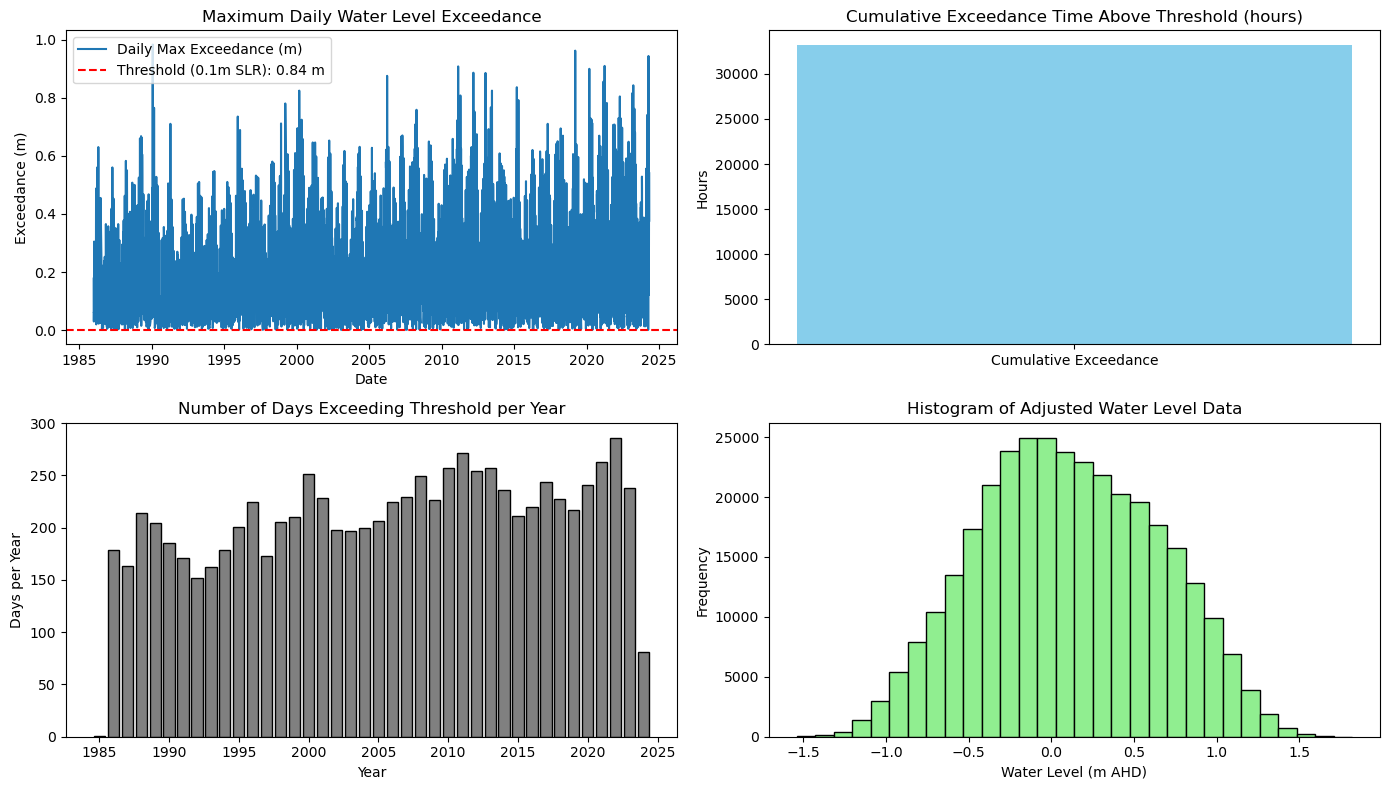

In [18]:
plt.figure(figsize=(14, 8))

# Maximum Daily Water Level Exceedance Plot
plt.subplot(2, 2, 1)
plt.plot(daily_exceedance.index, daily_exceedance, label='Daily Max Exceedance (m)')
plt.axhline(y=0, color='r', linestyle='--', label=f'Threshold (0.1m SLR): {exceedance_threshold:.2f} m')
plt.xlabel('Date')
plt.ylabel('Exceedance (m)')
plt.title('Maximum Daily Water Level Exceedance')
plt.legend()

# Cumulative Exceedance Bar Plot
plt.subplot(2, 2, 2)
plt.bar(['Cumulative Exceedance'], [cumulative_exceedance], color='skyblue')
plt.ylabel('Hours')
plt.title('Cumulative Exceedance Time Above Threshold (hours)')

# Histogram of Exceedance Days per Year
plt.subplot(2, 2, 3)
plt.bar(daily_exceedance_per_year.index, daily_exceedance_per_year.values, color='gray', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Days per Year')
plt.title('Number of Days Exceeding Threshold per Year')

# Histogram of Water Level Data
plt.subplot(2, 2, 4)
plt.hist(time_series_nan_dropped, bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Water Level (m AHD)')
plt.ylabel('Frequency')
plt.title('Histogram of Adjusted Water Level Data')

# Show all plots
plt.tight_layout()
plt.show()

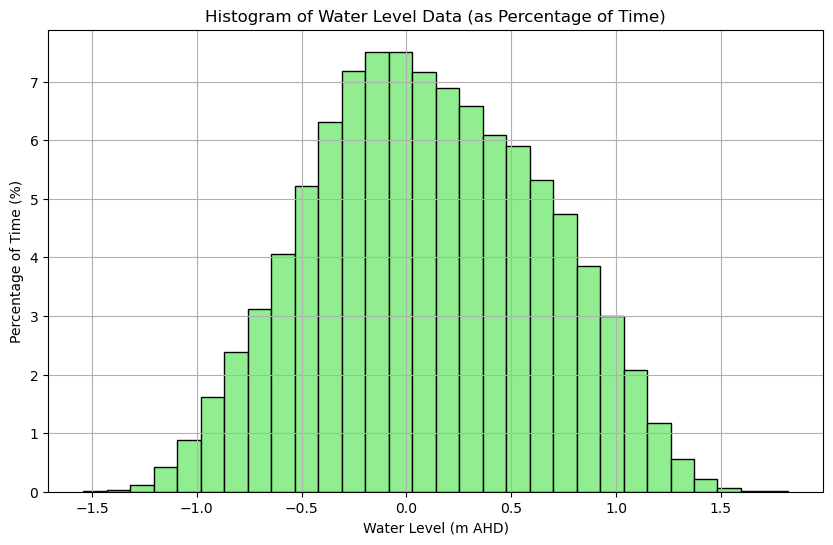

In [19]:

# Calculate frequency in seconds (assumes datetime index)
frequency_seconds = (time_series_nan_dropped.index[1] - time_series_nan_dropped.index[0]).total_seconds()

# Calculate the number of samples per day
samples_per_day = 86400 / frequency_seconds

# Calculate total years in the dataset
total_years = (time_series_nan_dropped.index[-1] - time_series_nan_dropped.index[0]).days / 365.25

# Plot histogram of water levels as percentage of time
plt.figure(figsize=(10, 6))

# Calculate histogram bins and counts
counts, bins = np.histogram(time_series_nan_dropped, bins=30)

# Normalize counts to get the percentage of time (probability)
probability = counts / len(time_series_nan_dropped) * 100  # Convert to percentage of total samples

# Plot the histogram with the probability (percentage) on the y-axis
plt.bar(bins[:-1], probability, width=np.diff(bins), color='lightgreen', edgecolor='black', align='edge')
plt.xlabel('Water Level (m AHD)')
plt.ylabel('Percentage of Time (%)')
plt.title('Histogram of Water Level Data (as Percentage of Time)')
plt.grid(True)
plt.show()


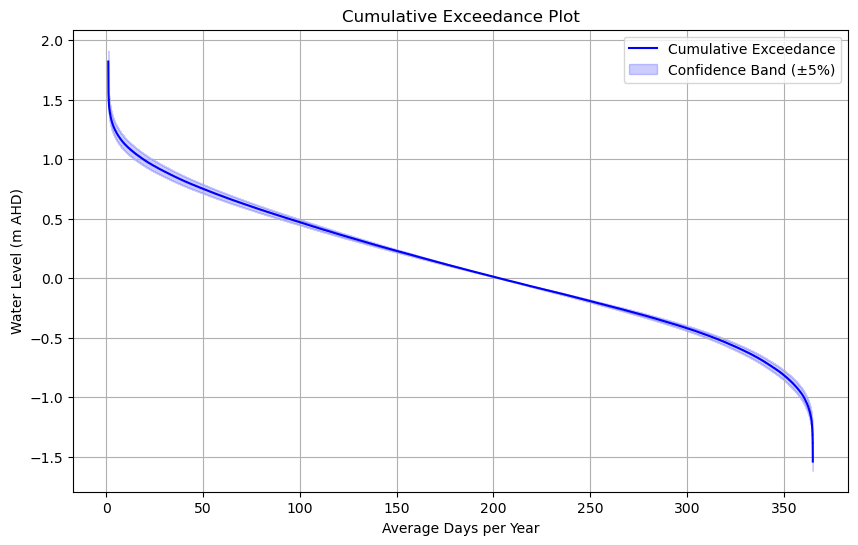

In [20]:
sorted_levels = np.sort(time_series_nan_dropped)[::-1]  # Sort in descending order

# Step 2: Calculate the exceedance days per year
# Get total years in the data
total_days = len(time_series_nan_dropped) / (24 * 365.25 / frequency_seconds)  # Adjust based on frequency
days_per_year = 365

# Calculate average days per year corresponding to each exceedance level
# exceedance_days_per_year = np.arange(1, len(sorted_levels) + 1) / (len(sorted_levels) / total_years)
exceedance_days_per_year = np.linspace(1, days_per_year, len(sorted_levels))

# Optional: Define a confidence interval band (e.g., ±5% around the exceedance line)
# This is just an example; adjust based on actual confidence intervals, if available.
confidence_band = 0.05 * sorted_levels  # 5% confidence band

# Step 3: Plot cumulative exceedance
plt.figure(figsize=(10, 6))
plt.plot(exceedance_days_per_year, sorted_levels, label='Cumulative Exceedance', color='blue')

# Plot confidence band if needed
plt.fill_between(exceedance_days_per_year, sorted_levels - confidence_band, sorted_levels + confidence_band, 
                 color='blue', alpha=0.2, label='Confidence Band (±5%)')

# Labeling
plt.xlabel('Average Days per Year')
plt.ylabel('Water Level (m AHD)')
plt.title('Cumulative Exceedance Plot')
plt.legend()
plt.grid(True)
plt.show()

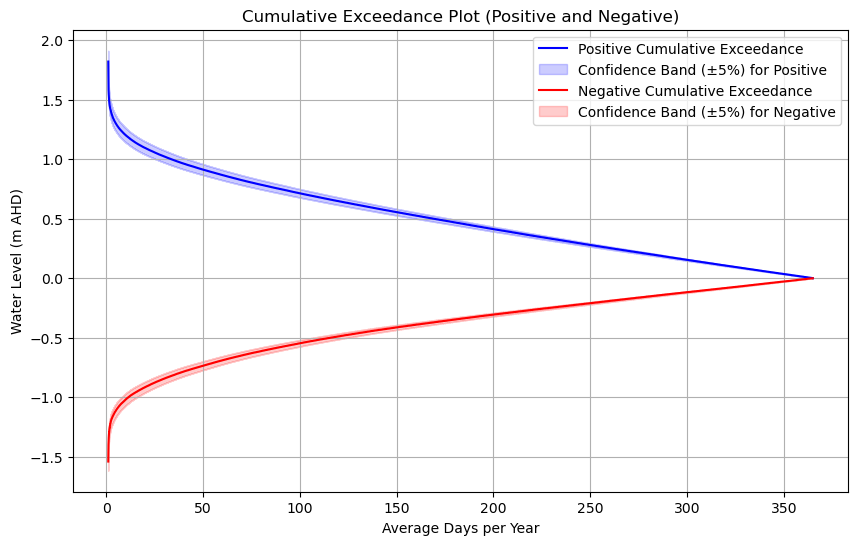

In [21]:
positive_values = time_series_nan_dropped[time_series_nan_dropped > 0]
negative_values = time_series_nan_dropped[time_series_nan_dropped < 0]

# Sort the values
sorted_positive = np.sort(positive_values)[::-1]  # Sort positive values in descending order
sorted_negative = np.sort(negative_values)  # Sort negative values in ascending order (more negative first)

# Calculate the exceedance days per year for both positive and negative values
total_days = len(time_series_nan_dropped) / (24 * 365.25 / frequency_seconds)  # Adjust based on frequency
days_per_year = 365

# Exceedance for positive and negative values separately
exceedance_days_positive = np.linspace(1, days_per_year, len(sorted_positive))
exceedance_days_negative = np.linspace(1, days_per_year, len(sorted_negative))

# Optional: Define a confidence interval band (e.g., ±5% around the exceedance line)
confidence_band_positive = 0.05 * sorted_positive  # 5% confidence band for positive values
confidence_band_negative = 0.05 * sorted_negative  # 5% confidence band for negative values

# Step 3: Plot cumulative exceedance for positive and negative values
plt.figure(figsize=(10, 6))

# Plot for positive values
plt.plot(exceedance_days_positive, sorted_positive, label='Positive Cumulative Exceedance', color='blue')
plt.fill_between(exceedance_days_positive, sorted_positive - confidence_band_positive, sorted_positive + confidence_band_positive, 
                 color='blue', alpha=0.2, label='Confidence Band (±5%) for Positive')

# Plot for negative values (reverse exceedance, where more negative values are exceeded less)
plt.plot(exceedance_days_negative, sorted_negative, label='Negative Cumulative Exceedance', color='red')
plt.fill_between(exceedance_days_negative, sorted_negative - confidence_band_negative, sorted_negative + confidence_band_negative, 
                 color='red', alpha=0.2, label='Confidence Band (±5%) for Negative')

# Labeling
plt.xlabel('Average Days per Year')
plt.ylabel('Water Level (m AHD)')
plt.title('Cumulative Exceedance Plot (Positive and Negative)')
plt.legend()
plt.grid(True)
plt.show()

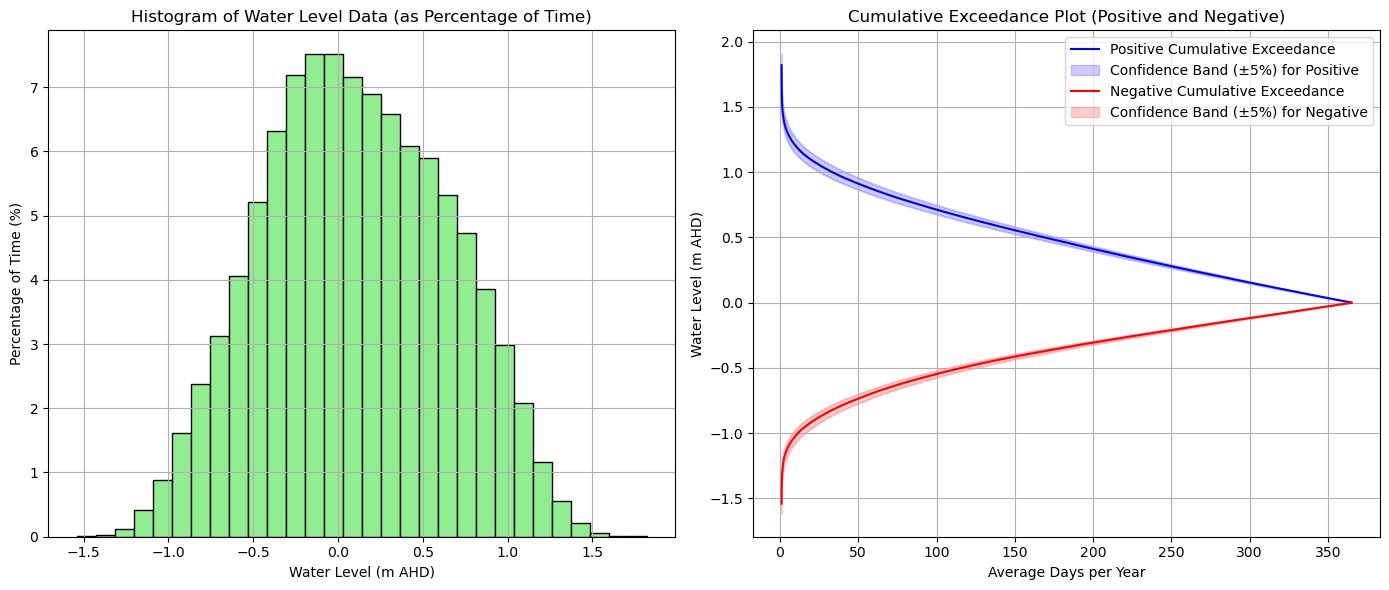

In [22]:
# Create subplots (2 plots in one row)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: Histogram as Percentage of Time ---
# Calculate histogram bins and counts
counts, bins = np.histogram(time_series_nan_dropped, bins=30)

# Normalize counts to get the percentage of time (probability)
probability = counts / len(time_series_nan_dropped) * 100  # Convert to percentage of total samples

# Plot the histogram with the probability (percentage) on the y-axis
axes[0].bar(bins[:-1], probability, width=np.diff(bins), color='lightgreen', edgecolor='black', align='edge')
axes[0].set_xlabel('Water Level (m AHD)')
axes[0].set_ylabel('Percentage of Time (%)')
axes[0].set_title('Histogram of Water Level Data (as Percentage of Time)')
axes[0].grid(True)

# --- Plot 2: Cumulative Exceedance Plot ---
# Plot for positive values
axes[1].plot(exceedance_days_positive, sorted_positive, label='Positive Cumulative Exceedance', color='blue')
axes[1].fill_between(exceedance_days_positive, sorted_positive - confidence_band_positive, sorted_positive + confidence_band_positive, 
                 color='blue', alpha=0.2, label='Confidence Band (±5%) for Positive')

# Plot for negative values (reverse exceedance, where more negative values are exceeded less)
axes[1].plot(exceedance_days_negative, sorted_negative, label='Negative Cumulative Exceedance', color='red')
axes[1].fill_between(exceedance_days_negative, sorted_negative - confidence_band_negative, sorted_negative + confidence_band_negative, 
                 color='red', alpha=0.2, label='Confidence Band (±5%) for Negative')

# Labeling
axes[1].set_xlabel('Average Days per Year')
axes[1].set_ylabel('Water Level (m AHD)')
axes[1].set_title('Cumulative Exceedance Plot (Positive and Negative)')
axes[1].legend()
axes[1].grid(True)

# Show the plots
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

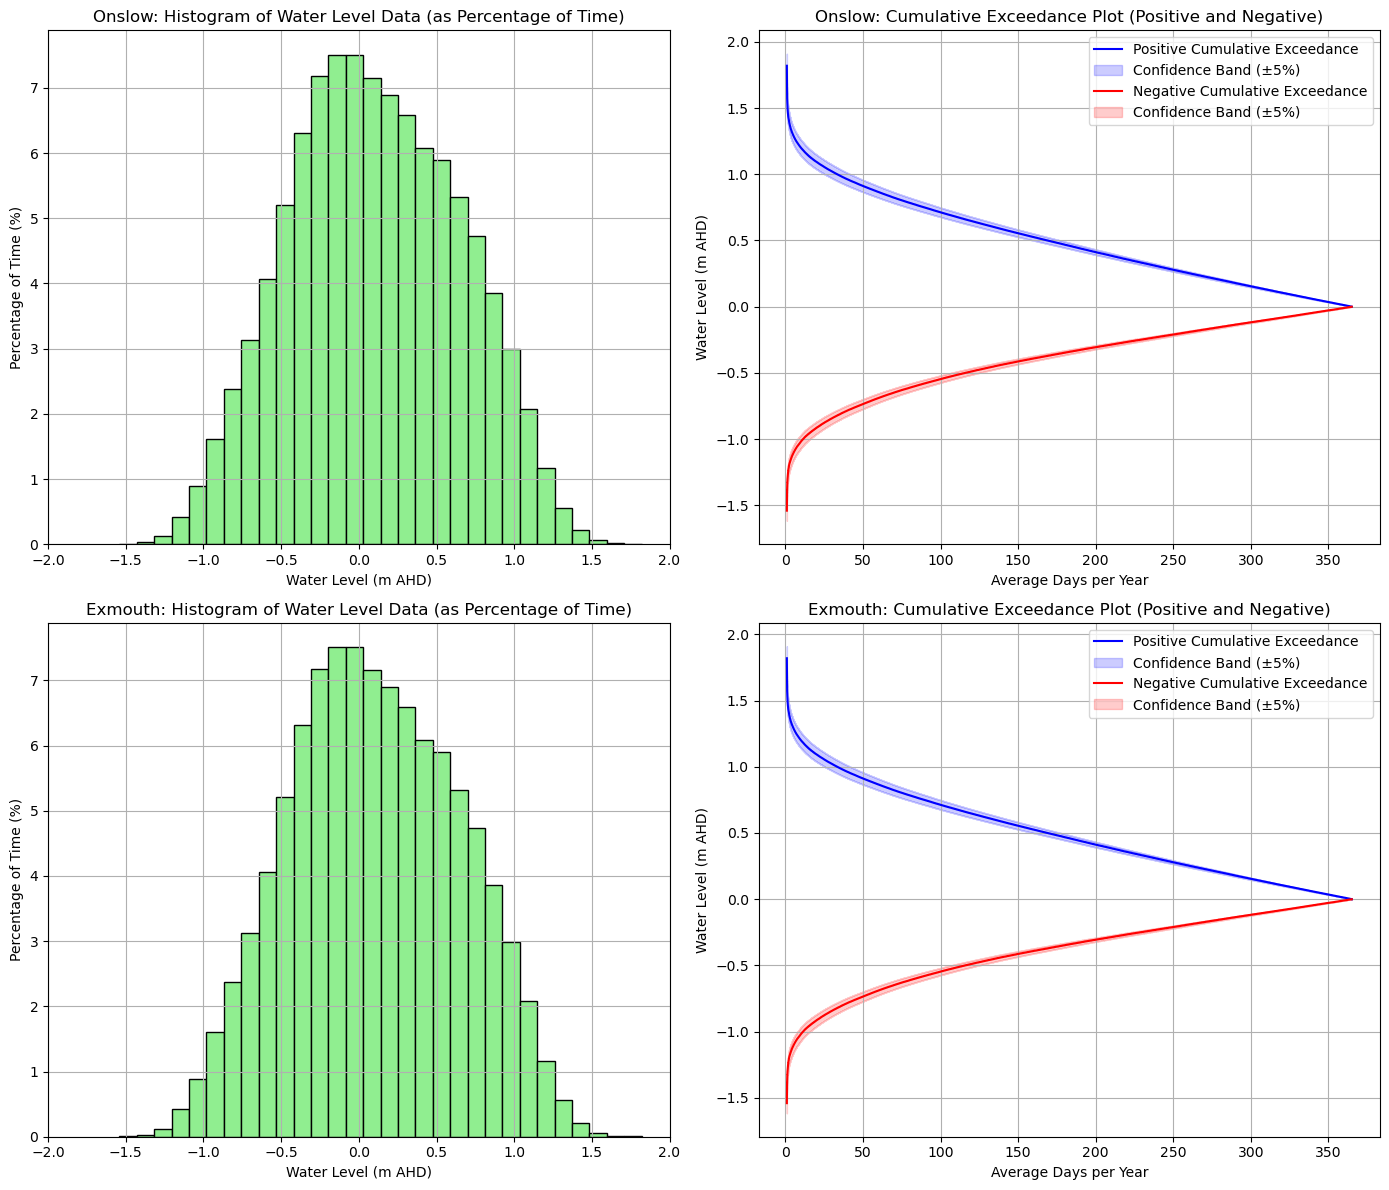

In [23]:

time_series = time_series_nan_dropped
# Calculate frequency in seconds (assumes datetime index)
frequency_seconds = (time_series_nan_dropped.index[1] - time_series_nan_dropped.index[0]).total_seconds()

# Calculate the number of samples per day
samples_per_day = 86400 / frequency_seconds

# Calculate total years in the dataset
total_years = (time_series_nan_dropped.index[-1] - time_series_nan_dropped.index[0]).days / 365.25

# Separate positive and negative values for both datasets
positive_values_dropped = time_series_nan_dropped[time_series_nan_dropped > 0]
negative_values_dropped = time_series_nan_dropped[time_series_nan_dropped < 0]

positive_values = time_series[time_series > 0]
negative_values = time_series[time_series < 0]

# Sort the values
sorted_positive_dropped = np.sort(positive_values_dropped)[::-1]  # Sort positive values in descending order
sorted_negative_dropped = np.sort(negative_values_dropped)  # Sort negative values in ascending order

sorted_positive = np.sort(positive_values)[::-1]
sorted_negative = np.sort(negative_values)

# Calculate the exceedance days per year for both positive and negative values
total_days = len(time_series_nan_dropped) / (24 * 365.25 / frequency_seconds)  # Adjust based on frequency
days_per_year = 365

# Exceedance for positive and negative values separately for both datasets
exceedance_days_positive_dropped = np.linspace(1, days_per_year, len(sorted_positive_dropped))
exceedance_days_negative_dropped = np.linspace(1, days_per_year, len(sorted_negative_dropped))

exceedance_days_positive = np.linspace(1, days_per_year, len(sorted_positive))
exceedance_days_negative = np.linspace(1, days_per_year, len(sorted_negative))

# Optional: Define a confidence interval band (e.g., ±5% around the exceedance line)
confidence_band_positive_dropped = 0.05 * sorted_positive_dropped  # 5% confidence band for positive values
confidence_band_negative_dropped = 0.05 * sorted_negative_dropped  # 5% confidence band for negative values

confidence_band_positive = 0.05 * sorted_positive  # 5% confidence band for positive values
confidence_band_negative = 0.05 * sorted_negative  # 5% confidence band for negative values

# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# --- Plot 1: Histogram for Onslow (time_series_nan_dropped) as Percentage of Time ---
# Calculate histogram bins and counts
counts, bins = np.histogram(time_series_nan_dropped, bins=30)

# Normalize counts to get the percentage of time (probability)
probability = counts / len(time_series_nan_dropped) * 100  # Convert to percentage of total samples

# Plot the histogram with the probability (percentage) on the y-axis
axes[0, 0].bar(bins[:-1], probability, width=np.diff(bins), color='lightgreen', edgecolor='black', align='edge')
axes[0, 0].set_xlabel('Water Level (m AHD)')
axes[0, 0].set_ylabel('Percentage of Time (%)')
axes[0, 0].set_title('Onslow: Histogram of Water Level Data (as Percentage of Time)')
axes[0, 0].grid(True)
axes[0,0].set_xlim(-2, 2)

# --- Plot 2: Cumulative Exceedance Plot for Onslow (time_series_nan_dropped) ---
# Plot for positive values
axes[0, 1].plot(exceedance_days_positive_dropped, sorted_positive_dropped, label='Positive Cumulative Exceedance', color='blue')
axes[0, 1].fill_between(exceedance_days_positive_dropped, sorted_positive_dropped - confidence_band_positive_dropped,
                        sorted_positive_dropped + confidence_band_positive_dropped, color='blue', alpha=0.2, label='Confidence Band (±5%)')

# Plot for negative values
axes[0, 1].plot(exceedance_days_negative_dropped, sorted_negative_dropped, label='Negative Cumulative Exceedance', color='red')
axes[0, 1].fill_between(exceedance_days_negative_dropped, sorted_negative_dropped - confidence_band_negative_dropped,
                        sorted_negative_dropped + confidence_band_negative_dropped, color='red', alpha=0.2, label='Confidence Band (±5%)')

# Labeling for Onslow plot
axes[0, 1].set_xlabel('Average Days per Year')
axes[0, 1].set_ylabel('Water Level (m AHD)')
axes[0, 1].set_title('Onslow: Cumulative Exceedance Plot (Positive and Negative)')
axes[0, 1].legend()
axes[0, 1].grid(True)

# --- Plot 3: Histogram for Exmouth (time_series) as Percentage of Time ---
# Calculate histogram bins and counts for Exmouth
counts, bins = np.histogram(time_series, bins=30)

# Normalize counts to get the percentage of time (probability)
probability = counts / len(time_series) * 100  # Convert to percentage of total samples

# Plot the histogram with the probability (percentage) on the y-axis
axes[1, 0].bar(bins[:-1], probability, width=np.diff(bins), color='lightgreen', edgecolor='black', align='edge')
axes[1, 0].set_xlabel('Water Level (m AHD)')
axes[1, 0].set_ylabel('Percentage of Time (%)')
axes[1, 0].set_title('Exmouth: Histogram of Water Level Data (as Percentage of Time)')
axes[1, 0].grid(True)
axes[1,0].set_xlim(-2, 2)

# --- Plot 4: Cumulative Exceedance Plot for Exmouth (time_series) ---
# Plot for positive values
axes[1, 1].plot(exceedance_days_positive, sorted_positive, label='Positive Cumulative Exceedance', color='blue')
axes[1, 1].fill_between(exceedance_days_positive, sorted_positive - confidence_band_positive,
                        sorted_positive + confidence_band_positive, color='blue', alpha=0.2, label='Confidence Band (±5%)')

# Plot for negative values
axes[1, 1].plot(exceedance_days_negative, sorted_negative, label='Negative Cumulative Exceedance', color='red')
axes[1, 1].fill_between(exceedance_days_negative, sorted_negative - confidence_band_negative,
                        sorted_negative + confidence_band_negative, color='red', alpha=0.2, label='Confidence Band (±5%)')

# Labeling for Exmouth plot
axes[1, 1].set_xlabel('Average Days per Year')
axes[1, 1].set_ylabel('Water Level (m AHD)')
axes[1, 1].set_title('Exmouth: Cumulative Exceedance Plot (Positive and Negative)')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [49]:
# Loading the data'

eta_total = pd.read_csv(r'C:\Users\00100958\Daniel\Mardie\Data\Onslow_tide_2023_2024\Onslow_resampled_detrended.csv') # this is the total eta, same as the measured WL values but detrended (see above for how I applied the detrending)
eta_SA_SSA = pd.read_csv(r'C:\Users\00100958\Daniel\Mardie\Data\Onslow_tide_2023_2024\Onslow_tide_sa_ssa.csv') # this is done by doing harmonic analysis by including the SA and SSA consituents
eta_AT = pd.read_csv(r'C:\Users\00100958\Daniel\Mardie\Data\Onslow_tide_2023_2024\Onslow_tide_excluding_SA_SSA.csv') # this is done by doing harmonic analysis by excluding the SA and SSA consituents
eta_ntr = pd.DataFrame()
eta_ntr['level'] = eta_total['resampled_detrended'].values - eta_AT['predicted_tide'].values
eta_ntr['time'] = eta_AT['time'].values
eta_ntr


,level,time
0,0.129232,1985-12-31 16:07:30+0000
1,0.115574,1985-12-31 16:37:30+0000
2,0.138000,1985-12-31 17:07:30+0000
3,0.166348,1985-12-31 17:37:30+0000
4,0.188314,1985-12-31 18:07:30+0000
...,...,...
664551,0.091657,2024-04-30 13:42:30+0000
664552,0.110517,2024-04-30 14:12:30+0000
664553,0.140363,2024-04-30 14:42:30+0000
664554,0.168678,2024-04-30 15:12:30+0000


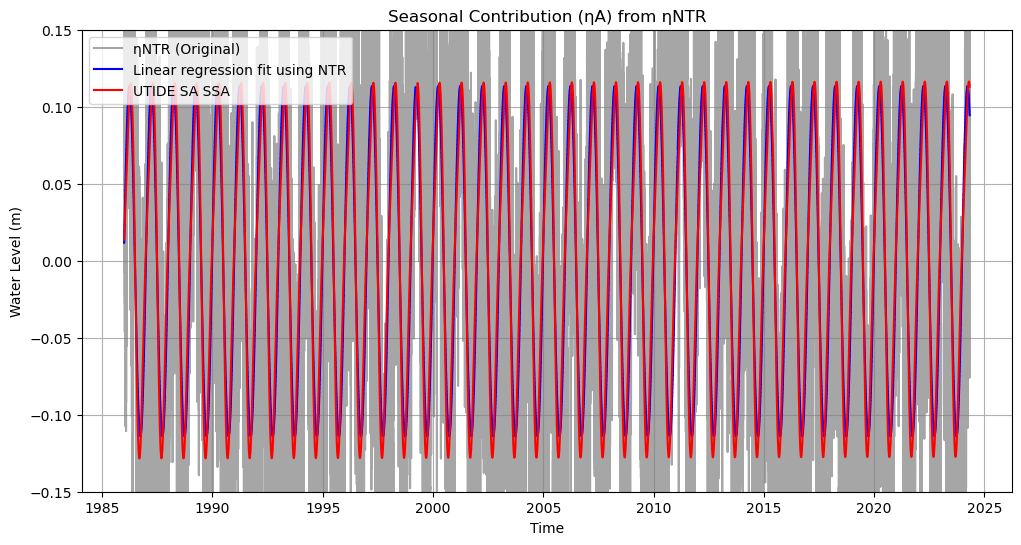

Annual Amplitude (A1): 0.11366132363506379
Annual Phase (phi1): -1.4673194206867222
Semiannual Amplitude (A2): 0.00014409088244167457
Semiannual Phase (phi2): 1.0217494091167636
Constant Offset (C): -0.00019772066486660803


In [25]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

df_ntr = eta_ntr
df_ntr = df_ntr.reset_index()
df_ntr['time'] = pd.to_datetime(df_ntr['time'])
df_ntr['time_numeric'] = (df_ntr['time'] - df_ntr['time'].iloc[0]).dt.days

# Harmonic function to fit
def harmonic_model(t, A1, phi1, A2, phi2, C):
    """
    t: time (days)
    A1: amplitude of annual harmonic
    phi1: phase of annual harmonic
    A2: amplitude of semiannual harmonic
    phi2: phase of semiannual harmonic
    C: constant offset
    """
    annual = A1 * np.cos(2 * np.pi * t / 365.25 + phi1)
    semiannual = A2 * np.cos(4 * np.pi * t / 365.25 + phi2)
    return annual + semiannual + C

# Fit the model to the data
t = df_ntr['time_numeric'].values
y = df_ntr['level'].values
popt, pcov = curve_fit(harmonic_model, t, y, p0=[0.5, 0, 0.2, 0, 0])

# Extract fitted parameters
A1, phi1, A2, phi2, C = popt

# Calculate the seasonal contribution (ηA)
df_ntr['eta_seasonal'] = harmonic_model(t, *popt)

eta_SA_SSA = eta_SA_SSA.reset_index()
eta_SA_SSA['time'] = pd.to_datetime(eta_SA_SSA['time']) 
# Plot the results
plt.figure(figsize=(12, 6))

# Original time series
plt.plot(df_ntr['time'], df_ntr['level'], label='ηNTR (Original)', color='gray', alpha=0.7)

# Seasonal contribution
plt.plot(df_ntr['time'], df_ntr['eta_seasonal'], label='Linear regression fit using NTR', color='blue')
plt.plot(eta_SA_SSA['time'],eta_SA_SSA['predicted_tide'], label='UTIDE SA SSA', color='red')

# Labels and legend
plt.title('Seasonal Contribution (ηA) from ηNTR')
plt.xlabel('Time')
plt.ylabel('Water Level (m)')
plt.legend()
plt.grid()
plt.ylim(-0.15,0.15)

plt.show()

# Print seasonal parameters
print(f"Annual Amplitude (A1): {A1}")
print(f"Annual Phase (phi1): {phi1}")
print(f"Semiannual Amplitude (A2): {A2}")
print(f"Semiannual Phase (phi2): {phi2}")
print(f"Constant Offset (C): {C}")


In [26]:
eta_i = pd.DataFrame()
eta_i['level'] = eta_ntr['level'].values - df_ntr['eta_seasonal'].values
eta_i['time'] = eta_AT['time'].values
eta_i['time'] = pd.to_datetime(eta_i['time'])

eta_i.set_index('time', inplace=True)

window_size = len(eta_i.resample('M').mean())  # Number of data points in the month
eta_i['rolling_monthly_mean'] = eta_i['level'].rolling(window=window_size, min_periods=1).mean()


# Reset the index for clarity
eta_interannual = eta_i

# eta_interannual['time'] = pd.to_datetime(eta_i['time'])
# eta_interannual.set_index('time', inplace=True)
eta_interannual

,level,rolling_monthly_mean
time,,
1985-12-31 16:07:30+00:00,0.117614,0.117614
1985-12-31 16:37:30+00:00,0.103956,0.110785
1985-12-31 17:07:30+00:00,0.126382,0.115984
1985-12-31 17:37:30+00:00,0.154730,0.125670
1985-12-31 18:07:30+00:00,0.176696,0.135876
...,...,...
2024-04-30 13:42:30+00:00,-0.002752,-0.001426
2024-04-30 14:12:30+00:00,0.016107,-0.001464
2024-04-30 14:42:30+00:00,0.045953,-0.001381


In [27]:
eta_interannual = eta_interannual.reset_index()
storm_surge_signal = (
    eta_ntr['level'] -  df_ntr['eta_seasonal']  - eta_interannual['rolling_monthly_mean']
)
storm_surge_signal
# storm_surge_signal = storm_surge_signal - eta_interannual['rolling_monthly_mean']
# print(storm_surge_signal.index)
# print(eta_interannual.index)
eta_interannual['storm_surge_signal'] = storm_surge_signal
# eta_interannual = eta_interannual.drop(columns=['index'])
eta_interannual = eta_interannual.set_index('time')
eta_interannual

,level,rolling_monthly_mean,storm_surge_signal
time,,,
1985-12-31 16:07:30+00:00,0.117614,0.117614,0.000000
1985-12-31 16:37:30+00:00,0.103956,0.110785,-0.006829
1985-12-31 17:07:30+00:00,0.126382,0.115984,0.010398
1985-12-31 17:37:30+00:00,0.154730,0.125670,0.029059
1985-12-31 18:07:30+00:00,0.176696,0.135876,0.040821
...,...,...,...
2024-04-30 13:42:30+00:00,-0.002752,-0.001426,-0.001326
2024-04-30 14:12:30+00:00,0.016107,-0.001464,0.017571
2024-04-30 14:42:30+00:00,0.045953,-0.001381,0.047334


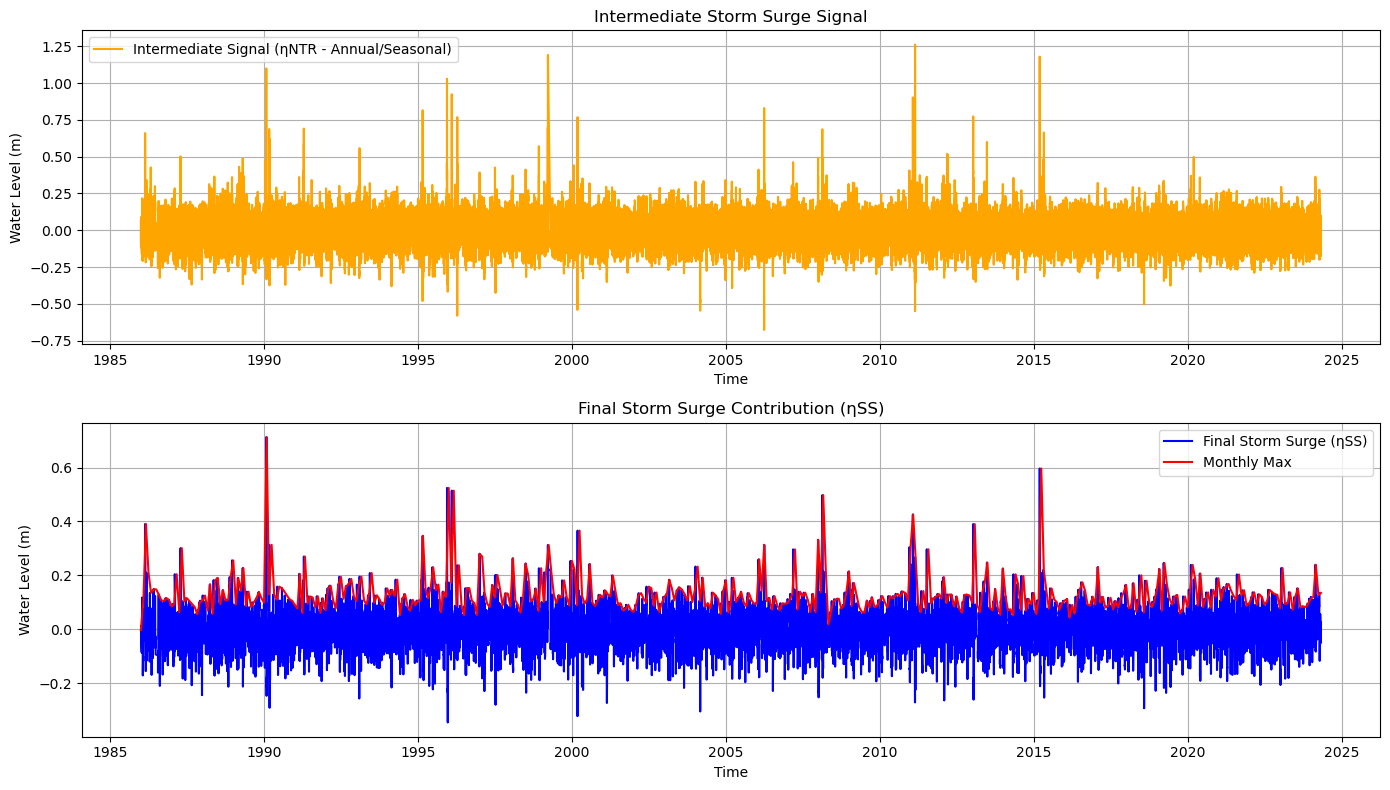

In [28]:


# Define the 40-hour window in terms of the sampling frequency
sampling_frequency_hours = (eta_interannual.index[1] - eta_interannual.index[0]).total_seconds() / 3600  # Hours between samples
window_size = int(40 / sampling_frequency_hours)  # Number of samples in a 40-hour window

# Ensure the window size is odd for symmetry in filtering
if window_size % 2 == 0:
    window_size += 1

# Create the Hamming window
hamming_window = np.hamming(window_size)

# Apply the Hamming-weighted moving average filter to the intermediate storm surge signal
filtered_signal = np.convolve(eta_interannual['storm_surge_signal'], hamming_window / hamming_window.sum(), mode='same')

# Store the resulting storm surge contribution (ηSS)
eta_stormsurge = pd.DataFrame({
    'time': eta_interannual.index,
    'level': filtered_signal,
})
eta_stormsurge = eta_stormsurge.set_index('time')

# ss_monthly_max = eta_stormsurge[filtered_signal].resample('M').max()

eta_stormsurge_monthlymax= eta_stormsurge['level'].resample('M').max()

# Plot the intermediate signal, the filtered signal, and the storm surge component
plt.figure(figsize=(14, 8))

# Subplot 1: Intermediate Storm Surge Signal
plt.subplot(2, 1, 1)
plt.plot(eta_interannual.index, eta_interannual['storm_surge_signal'], label='Intermediate Signal (ηNTR - Annual/Seasonal)', color='orange')
plt.title('Intermediate Storm Surge Signal')
plt.xlabel('Time')
plt.ylabel('Water Level (m)')
plt.grid()
plt.legend()

# Subplot 2: Final Storm Surge Contribution (ηSS)
plt.subplot(2, 1, 2)
plt.plot(eta_stormsurge.index, eta_stormsurge['level'], label='Final Storm Surge (ηSS)', color='blue')
plt.plot(eta_stormsurge_monthlymax.index, eta_stormsurge_monthlymax.values, label='Monthly Max', color='red')
plt.title('Final Storm Surge Contribution (ηSS)')
plt.xlabel('Time')
plt.ylabel('Water Level (m)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


In [50]:
# eta_AT = eta_AT.reset_index('time')

eta_AT['time'] = pd.to_datetime(eta_AT['time'])
eta_AT

,time,predicted_tide
0,1985-12-31 16:07:30+00:00,0.760821
1,1985-12-31 16:37:30+00:00,0.819479
2,1985-12-31 17:07:30+00:00,0.852053
3,1985-12-31 17:37:30+00:00,0.853705
4,1985-12-31 18:07:30+00:00,0.811738
...,...,...
664551,2024-04-30 13:42:30+00:00,-0.702807
664552,2024-04-30 14:12:30+00:00,-0.630000
664553,2024-04-30 14:42:30+00:00,-0.521513
664554,2024-04-30 15:12:30+00:00,-0.391495


In [ ]:

onslow_detrended = eta_total

onslow_detrended = onslow_detrended[['timeutc', 'resampled_detrended']]
onslow_detrended = onslow_detrended.dropna()
onslow_detrended['timeutc'] = pd.to_datetime(onslow_detrended['timeutc'])
onslow_detrended = onslow_detrended.set_index('timeutc')

monthly_max_detrended = onslow_detrended['resampled_detrended'].resample('M').max()

annual_mean = onslow_detrended['resampled_detrended'].resample('A').mean()

monthly_mean = onslow_detrended['resampled_detrended'].resample('M').mean()

eta_AT = eta_AT.set_index('time')
monthly_max_AT = eta_AT['predicted_tide'].resample('M').max()

monthly_max_interannual = eta_interannual['rolling_monthly_mean'].resample('M').max()



if onslow_detrended.index.tz is not None:
    onslow_detrended.index = onslow_detrended.index.tz_convert(None)

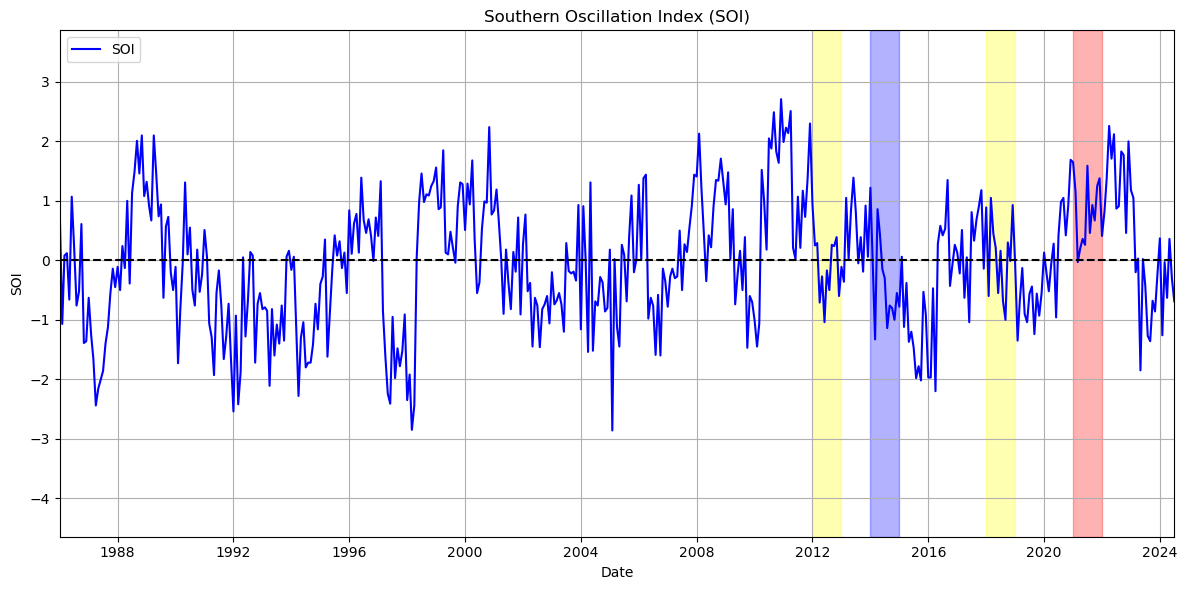

In [52]:
# http://www.bom.gov.au/climate/enso/soi/

soi = pd.read_csv(r'C:\Users\00100958\Daniel\Mardie\Data\BOM\soi_monthly.txt', delimiter=',', header=None, names=['Date', 'SOI'])

# Convert 'Date' column from YYYYmm format to a datetime object
soi['Date'] = pd.to_datetime(soi['Date'].astype(str), format='%Y%m')

soi['SOI'] = soi['SOI'] / 10

# Highlight calendar years with SOI between -1 and 1
soi['Year'] = soi['Date'].dt.year
# annual_mean_soi = soi.groupby('Year')['SOI'].mean().reset_index()
valid_years = soi.groupby('Year')['SOI'].apply(lambda x: x.between(-1.05, 1.05).all()).reset_index()
highlight_years = valid_years[valid_years['SOI']]['Year']

# Plot the SOI data
plt.figure(figsize=(12, 6))
plt.plot(soi['Date'], soi['SOI'], label='SOI', color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.title('Southern Oscillation Index (SOI)')
plt.xlabel('Date')
plt.ylabel('SOI')
plt.grid(True)
plt.legend()

# Highlight the calendar years with mean SOI between -1 and 1
for year in highlight_years:
    plt.axvspan(pd.to_datetime(f'{year}-01-01'), pd.to_datetime(f'{year}-12-31'), color='yellow', alpha=0.3)
plt.axvspan(pd.to_datetime('2014-01-01'), pd.to_datetime('2014-12-31'), color='blue', alpha=0.3)
plt.axvspan(pd.to_datetime('2021-01-01'), pd.to_datetime('2021-12-31'), color='red', alpha=0.3)
plt.xlim(pd.Timestamp('1986-01-01'), pd.Timestamp('2024-06-30'))
plt.tight_layout()
plt.show()

In [ ]:
valid_years = soi.groupby('Year')['SOI'].apply(lambda x: x.between(-1.05, 1.05).all()).reset_index()
highlight_years = valid_years[valid_years['SOI']]['Year']
highlight_years

19     1895
31     1907
44     1920
56     1932
61     1937
68     1944
72     1948
84     1960
103    1979
108    1984
136    2012
142    2018
Name: Year, dtype: int32

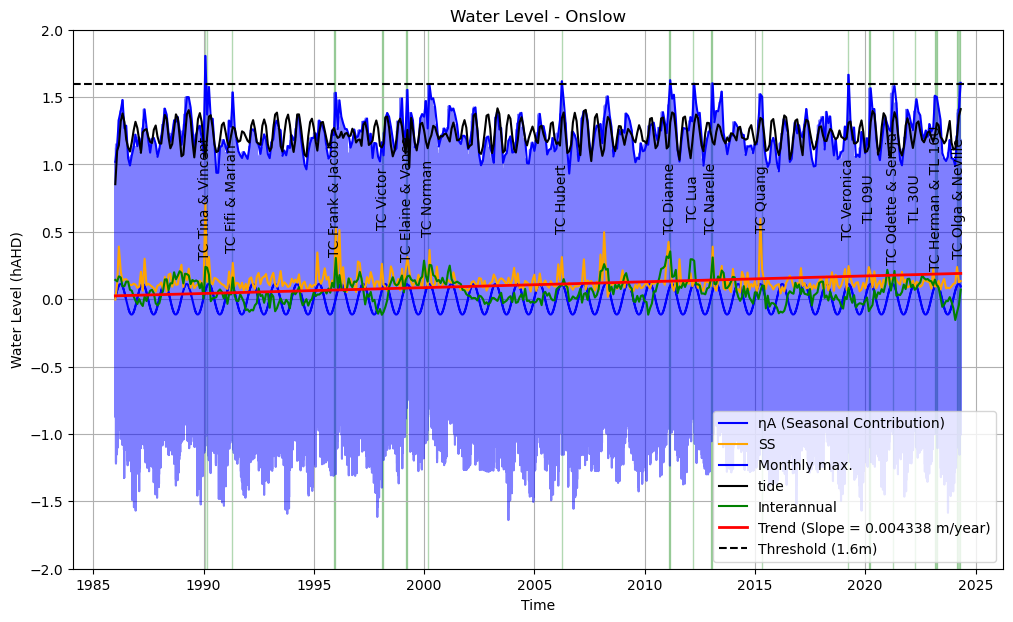

In [ ]:
# http://www.bom.gov.au/cyclone/tropical-cyclone-knowledge-centre/history/past-tropical-cyclones/

cyclone_events = [
    ("TC Olga & Neville", pd.Timestamp("2024-03-07"), pd.Timestamp("2024-04-11"), "green"),
    # ("TC Neville", pd.Timestamp("2024-03-07"), pd.Timestamp("2024-03-25"), "green"),
    ("TC Herman & TL 16U", pd.Timestamp("2023-02-22"), pd.Timestamp("2023-04-04"), "green"),
    ("TL 30U", pd.Timestamp("2022-03-30"), pd.Timestamp("2022-04-03"), "green"),
    ("TC Odette & Seroja", pd.Timestamp("2021-04-03"), pd.Timestamp("2021-04-12"), "green"),
    ("TL 09U", pd.Timestamp("2020-03-09"), pd.Timestamp("2020-03-13"), "green"),
    ("TC Veronica", pd.Timestamp("2019-03-18"), pd.Timestamp("2019-03-28"), "green"),
    ("TC Quang", pd.Timestamp("2015-04-27"), pd.Timestamp("2015-05-1"), "green"),
    ("TC Narelle", pd.Timestamp("2013-01-05"), pd.Timestamp("2013-01-15"), "green"),
    ("TC Lua", pd.Timestamp("2012-03-10"), pd.Timestamp("2012-03-18"), "green"),
    ("TC Dianne", pd.Timestamp("2011-02-14"), pd.Timestamp("2011-02-22"), "green"),
    ("TC Hubert", pd.Timestamp("2006-04-02"), pd.Timestamp("2006-04-07"), "green"),
    ("TC Norman", pd.Timestamp("2000-02-28"), pd.Timestamp("2000-03-08"), "green"),
    ("TC Elaine & Vance", pd.Timestamp("1999-03-14"), pd.Timestamp("1999-03-25"), "green"),
    ("TC Victor", pd.Timestamp("1998-02-09"), pd.Timestamp("1998-02-17"), "green"),
    ("TC Frank & Jacob", pd.Timestamp("1995-12-06"), pd.Timestamp("1995-12-13"), "green"),
    ("TC Fifi & Marian", pd.Timestamp("1991-04-10"), pd.Timestamp("1991-04-19"), "green"),
    ("TC Tina & Vincent", pd.Timestamp("1990-01-25"), pd.Timestamp("1990-01-28"), "green"),
    ("", pd.Timestamp("1990-03-02"), pd.Timestamp("1990-03-04"), "green"),
    ]


plt.figure(figsize=(12, 7))
plt.plot(onslow_detrended.index, onslow_detrended['resampled_detrended'], label='_nolegend_', color='blue',alpha = 0.5)
plt.plot(df_ntr['time'], df_ntr['eta_seasonal'], label='ηA (Seasonal Contribution)', color='blue')
plt.plot(eta_stormsurge_monthlymax.index, eta_stormsurge_monthlymax.values, label='SS', color='orange')
plt.plot(monthly_max_detrended.index, monthly_max_detrended, label='Monthly max.', color='blue')
plt.plot(monthly_max_AT.index, monthly_max_AT, label='tide', color='black')
plt.plot(monthly_max_interannual.index, monthly_max_interannual, label='Interannual', color='green')
plt.plot(data_onslow.index, trend_line, label=f'Trend (Slope = {slope * 365.25 * 24 * 3600:.6f} m/year)', color='red', linewidth=2)
# plt.plot(annual_mean.index, annual_mean, label='Annual Mean Water Level (hAHD)', color='black', linewidth=2)
# plt.plot(monthly_mean.index, monthly_mean, label='Monthly Mean Water Level (hAHD)', color='black', linewidth=2)
plt.axhline(y=1.6, color='black', linestyle='--', label='Threshold (1.6m)')

for name, start_date, end_date, color in cyclone_events:
    plt.axvspan(start_date, end_date, color=color, alpha=0.3, label='_nolegend_')  # Exclude from legend
    plt.text(start_date + (end_date - start_date) / 2, 0.75, name, color='black', 
             ha='center', va='center', rotation=90, fontsize=10)


# plt.xlim(pd.Timestamp('1986-01-01'), pd.Timestamp('1991-04-30'))
plt.xlabel('Time')
plt.ylabel('Water Level (hAHD)')
plt.title('Water Level - Onslow')
plt.legend(loc = 'lower right')
# plt.xlim(pd.Timestamp('1998-01-01'), pd.Timestamp('2000-12-31'))
plt.ylim(-2,2)
plt.grid(True)
plt.show()



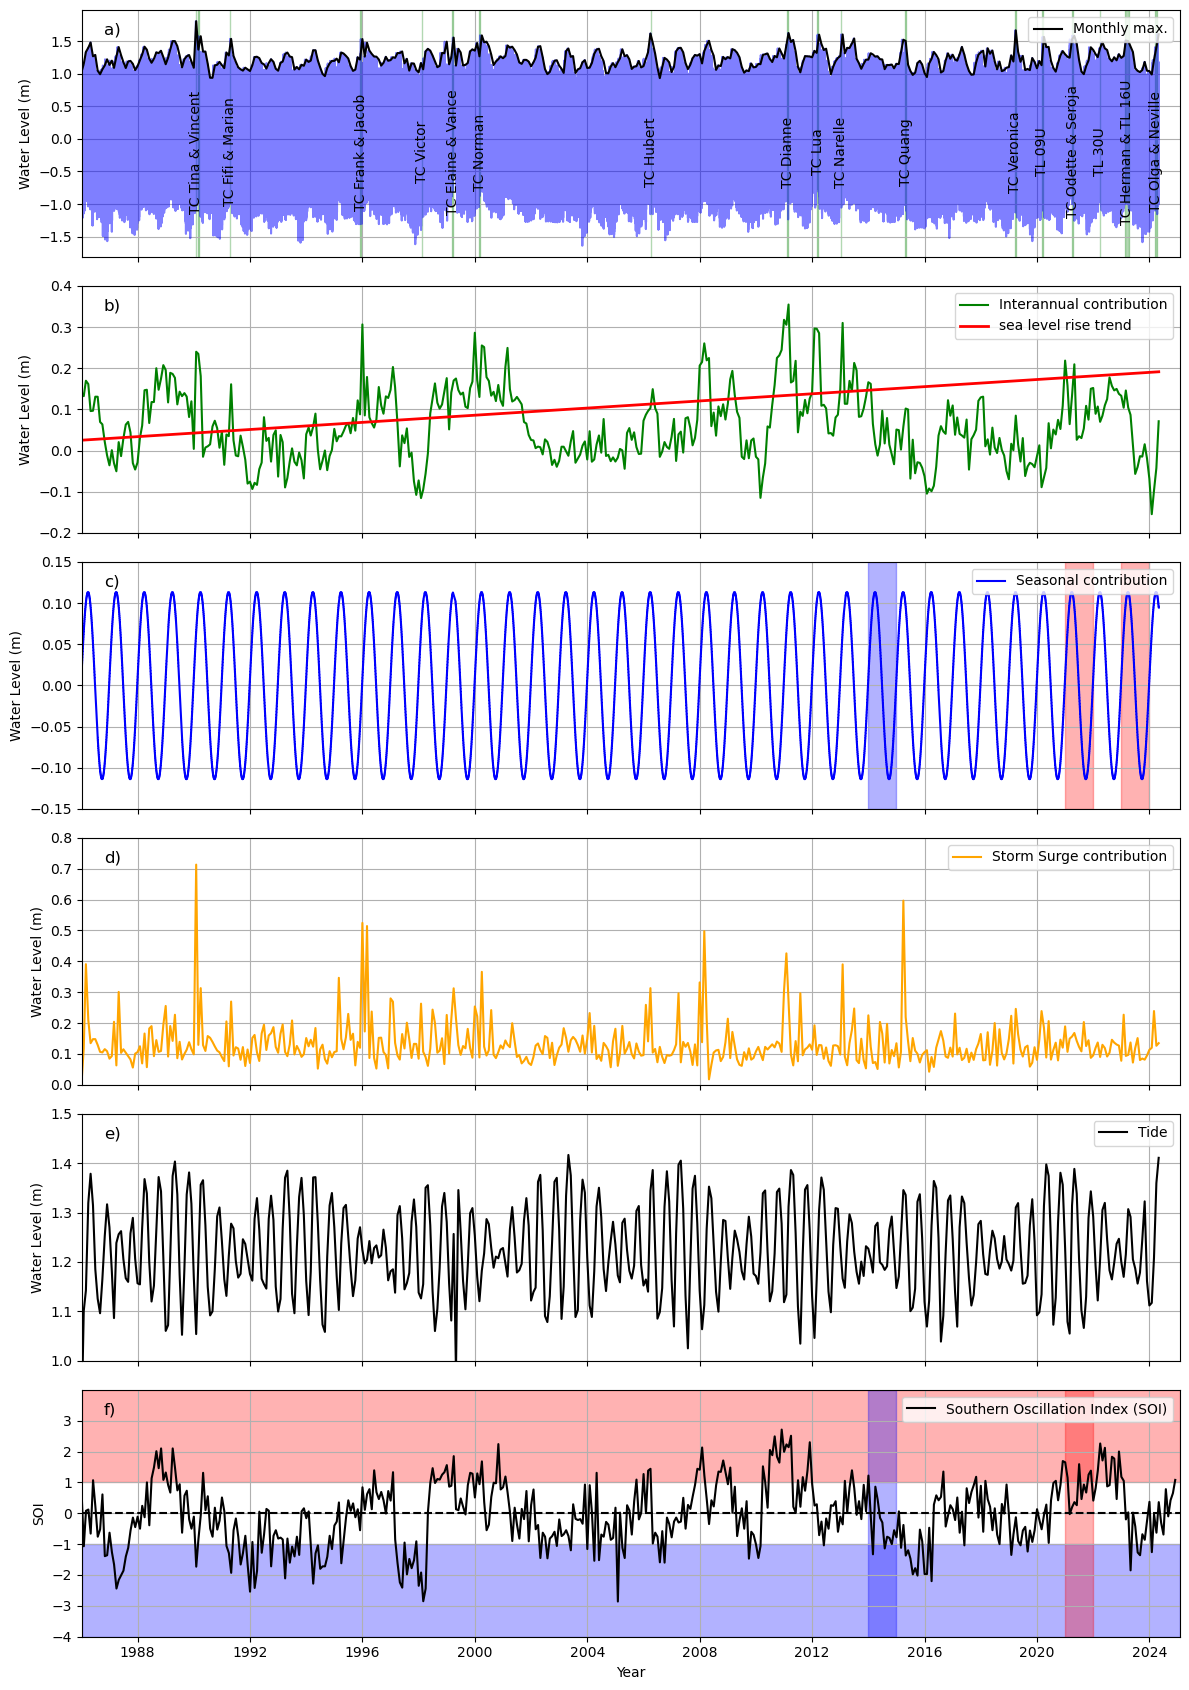

In [55]:
# Create the figure and subplots
fig, axes = plt.subplots(6, 1, figsize=(12, 17), sharex=True)

# 1. Onslow detrended and monthly max
axes[0].plot(onslow_detrended.index, onslow_detrended['resampled_detrended'], label='_nolegend_', color='blue', alpha=0.5)
axes[0].plot(monthly_max_detrended.index, monthly_max_detrended, label='Monthly max.', color='black')
for name, start_date, end_date, color in cyclone_events:
    axes[0].axvspan(start_date, end_date, color=color, alpha=0.3, label='_nolegend_')
    axes[0].text(start_date + (end_date - start_date) / 2, -0.2, name, color='black', ha='center', va='center', rotation=90, fontsize=10)
axes[0].set_ylabel('Water Level (m)')
axes[0].legend(loc='upper right')
axes[0].set_xlim(pd.to_datetime('1986-01-07'), pd.to_datetime('2025-02-01'))
axes[2].axvspan(pd.to_datetime('2023-01-01'), pd.to_datetime('2023-12-31'), color='red', alpha=0.3)
axes[0].grid(True)
# Add annotations for subplots


# 2. Interannual and mean sea level trend
axes[1].plot(monthly_max_interannual.index, monthly_max_interannual, label='Interannual contribution', color='green')
axes[1].plot(data_onslow.index, trend_line, label='sea level rise trend', color='red', linewidth=2)
# axes[1].axhline(y=1.6, color='black', linestyle='--', label='Threshold (1.6m)')
axes[1].set_ylabel('Water Level (m)')
axes[1].set_ylim(-0.2,0.4)
# axes[1].set_title('Interannual Contribution & Trend')
axes[1].legend(loc='upper right')
axes[1].grid(True)

# 3. Seasonal contribution
axes[2].plot(df_ntr['time'], df_ntr['eta_seasonal'], label='Seasonal contribution', color='blue')
axes[2].set_ylabel('Water Level (m)')
axes[2].set_ylim(-0.15,0.15)
axes[2].axvspan(pd.to_datetime('2014-01-01'), pd.to_datetime('2014-12-31'), color='blue', alpha=0.3)
axes[2].axvspan(pd.to_datetime('2021-01-01'), pd.to_datetime('2021-12-31'), color='red', alpha=0.3)
# axes[2].set_title('Seasonal Contribution')
axes[2].legend(loc='upper right')
axes[2].grid(True)

# 4. Storm surge contribution
axes[3].plot(eta_stormsurge_monthlymax.index, eta_stormsurge_monthlymax.values, label='Storm Surge contribution', color='orange')
axes[3].set_ylabel('Water Level (m)')
axes[3].legend(loc='upper right')
axes[3].set_ylim(0,0.8)
# axes[3].set_title('Storm Surge Contribution')
axes[3].grid(True)

# 5. Tide
axes[4].plot(monthly_max_AT.index, monthly_max_AT, label='Tide', color='black')
axes[4].set_ylabel('Water Level (m)')
# axes[4].set_title('Tide')
axes[4].legend(loc='upper right')
axes[4].set_ylim(1,1.5)
axes[4].grid(True)

# 6. SOI
# Plot the SOI data
axes[5].plot(soi['Date'], soi['SOI'], label='Southern Oscillation Index (SOI)', color='black')
axes[5].axhline(0, color='black', linestyle='--')
# Add horizontal patches: Red for SOI > 1, Blue for SOI < -1
# axes[5].fill_between(soi['Date'], 1, soi['SOI'], where=(soi['SOI'] > 1), color='red', alpha=0.3)
# axes[5].fill_between(soi['Date'], -1, soi['SOI'], where=(soi['SOI'] < -1), color='blue', alpha=0.3)
axes[5].set_ylim(-4, 4)
axes[5].axhspan(1, axes[5].get_ylim()[1], color='red', alpha=0.3)  # Fill above 1
axes[5].axhspan(axes[5].get_ylim()[0], -1, color='blue', alpha=0.3)  # Fill below -1

axes[5].legend(loc='upper right')
axes[5].grid(True)

axes[5].set_yticks(np.arange(-4, 4, 1))
# axes[5].set_xlabel('Date')
axes[5].set_ylabel('SOI')
# Adjust layout and show the plot
annotations = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)']
for ax, annotation in zip(axes, annotations):
    ax.text(0.02, 0.95, annotation, transform=ax.transAxes, fontsize=12, va='top', ha='left')
plt.axvspan(pd.to_datetime('2014-01-01'), pd.to_datetime('2014-12-31'), color='blue', alpha=0.3)
plt.axvspan(pd.to_datetime('2021-01-01'), pd.to_datetime('2021-12-31'), color='red', alpha=0.3)
plt.xlabel('Year')
plt.tight_layout()
plt.show()

